In [1]:
import zipfile

# Path to the uploaded zip file
zip_file_path = '/content/sample_data/Road Accident Data.csv.zip'
extracted_file_path = 'path/to/extracted/folder'

In [2]:
# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_file_path)

In [3]:
import pandas as pd

# Load the dataset
file_path = 'path/to/extracted/folder/Road Accident Data.csv'
accident_data = pd.read_csv(file_path)

# Display the columns in the dataset
print(accident_data.columns)

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Data Cleaning: Check for missing values and handle them
print(accident_data.info())
accident_data = accident_data.dropna()  # Drop rows with missing values for simplicity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [6]:
# Analyze the relationship between road conditions, weather, and time of day
# Convert time column to datetime if needed
accident_data['Time'] = pd.to_datetime(accident_data['Time'], format='%H:%M').dt.hour

<ipython-input-7-c0842669aabc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Time', data=accident_data, palette='viridis')


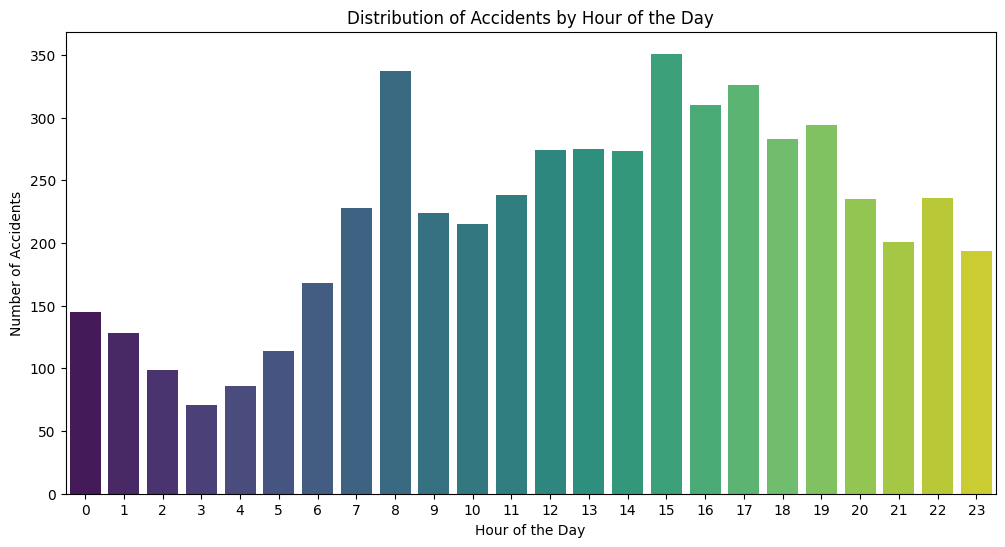

In [7]:
# Distribution of accidents by hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(x='Time', data=accident_data, palette='viridis')
plt.title('Distribution of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()


<ipython-input-8-7cf5e05ef7ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather_Conditions', data=accident_data, palette='viridis')


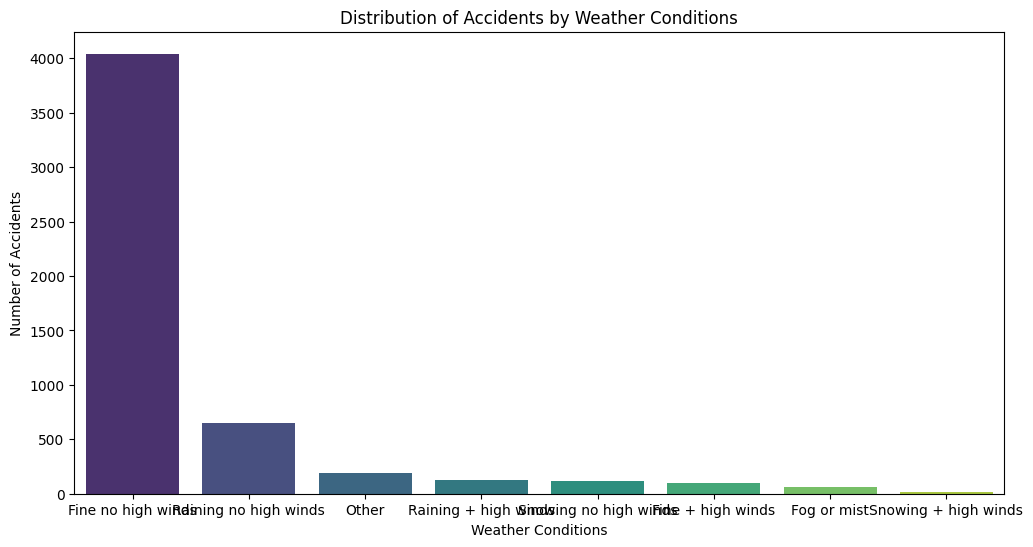

In [8]:
# Distribution of accidents by weather conditions
plt.figure(figsize=(12, 6))
sns.countplot(x='Weather_Conditions', data=accident_data, palette='viridis')
plt.title('Distribution of Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.show()

<ipython-input-9-11574ae72b21>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Road_Surface_Conditions', data=accident_data, palette='viridis')


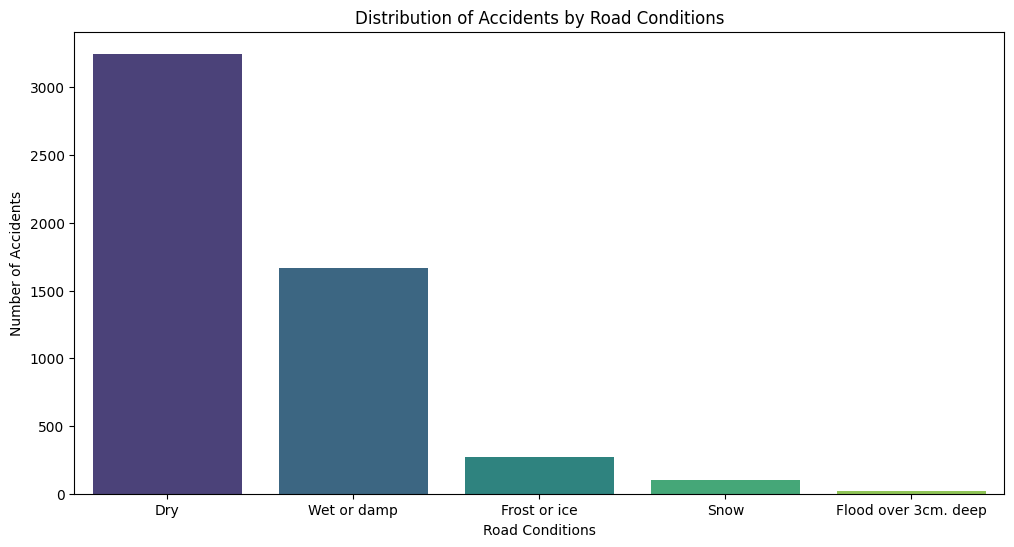

In [9]:
# Distribution of accidents by road conditions
plt.figure(figsize=(12, 6))
sns.countplot(x='Road_Surface_Conditions', data=accident_data, palette='viridis')
plt.title('Distribution of Accidents by Road Conditions')
plt.xlabel('Road Conditions')
plt.ylabel('Number of Accidents')
plt.show()

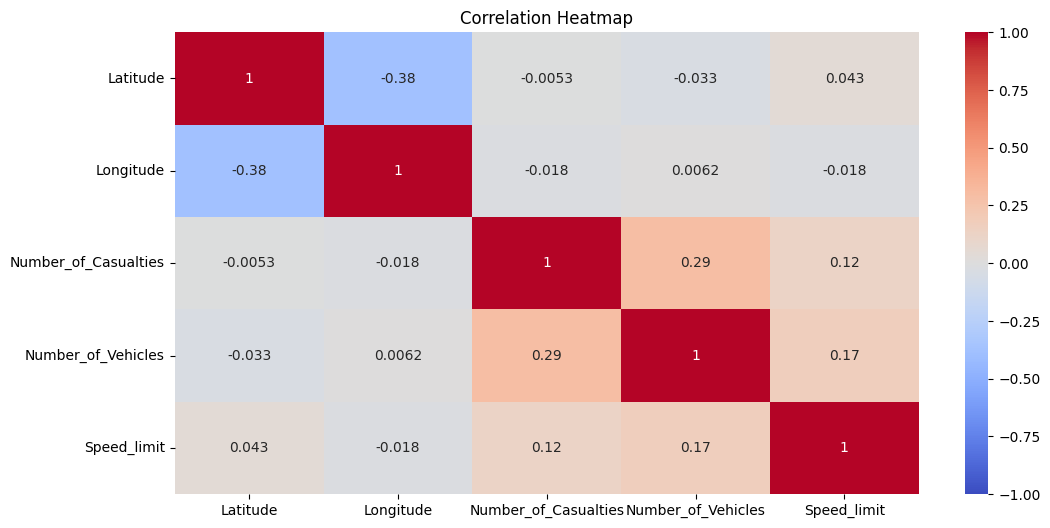

In [10]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(12, 6))
numeric_columns = accident_data.select_dtypes(include=['float64', 'int64']).columns
corr = accident_data[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


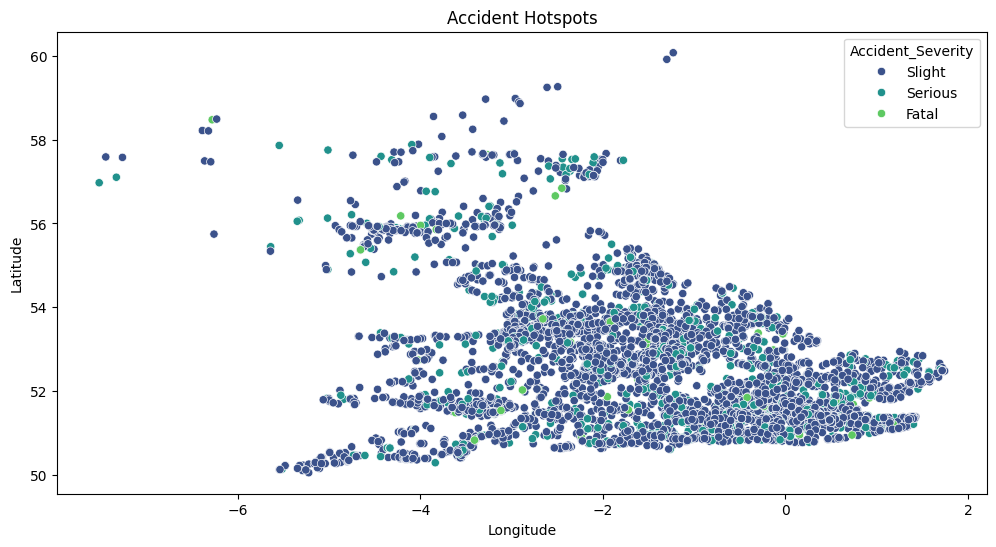

In [11]:
# Visualizing accident hotspots (example using latitude and longitude columns if available)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=accident_data, hue='Accident_Severity', palette='viridis')
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()